In [1]:
# imprting necessary libraries

import pandas as pd
import numpy as np


In [2]:
# getting the files :
df_movies = pd.read_csv('movies.csv')
df_rating = pd.read_csv('rating.csv')

In [3]:
# removing unnecessary  columns 
df_rating = df_rating.drop('Unnamed: 0', axis = 1)
df_movies = df_movies.drop(['Unnamed: 0','genres'], axis = 1)

In [4]:
print('Shape of Rating Dataset: ',(df_rating.shape))
df_rating.head()

Shape of Rating Dataset:  (100836, 4)


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
print('Shape of Movies Dataset: ', df_movies.shape)
df_movies.head()

Shape of Movies Dataset:  (9742, 2)


,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [6]:
# Merging both of the Dataset on key - movieId
df = pd.merge(df_movies, df_rating, on = 'movieId')

In [7]:
# # Saving the File : 
# df.to_csv('FinalFile.csv')

In [8]:
# peeking :)  at final dataset:
df.head()

,movieId,title,userId,rating,timestamp
0,1,Toy Story (1995),1,4.0,964982703
1,1,Toy Story (1995),5,4.0,847434962
2,1,Toy Story (1995),7,4.5,1106635946
3,1,Toy Story (1995),15,2.5,1510577970
4,1,Toy Story (1995),17,4.5,1305696483


#### EDA

In [9]:
# Visualization Exports;
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline


In [10]:
# LEts create a rating dataframe with average rating and number of rating : 
df.groupby('title')['rating'].mean().sort_values(ascending = False).head()

title
Gena the Crocodile (1969)              5.0
True Stories (1986)                    5.0
Cosmic Scrat-tastrophe (2015)          5.0
Love and Pigeons (1985)                5.0
Red Sorghum (Hong gao liang) (1987)    5.0
Name: rating, dtype: float64

In [11]:
df.groupby('title')['rating'].count().sort_values(ascending = False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [12]:
# creating a dataframe consisting a movie name and its mean rating:
rating_df = pd.DataFrame(df.groupby('title')['rating'].mean())

In [13]:
rating_df.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [14]:
# Lets include the count of rating for each movies:
rating_df['rating_count'] = pd.DataFrame(df.groupby('title')['rating'].count())

In [15]:
rating_df.head()

,rating,rating_count
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


<AxesSubplot:>

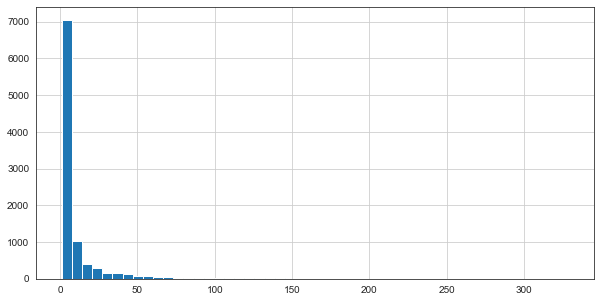

In [16]:
plt.figure(figsize = (10,5))
rating_df['rating_count'].hist(bins= 50)

<AxesSubplot:>

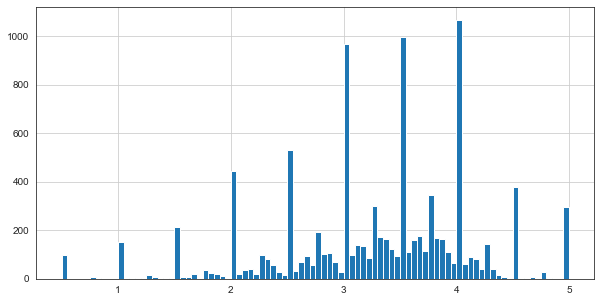

In [17]:
plt.figure(figsize = (10,5))
rating_df['rating'].hist(bins= 90)

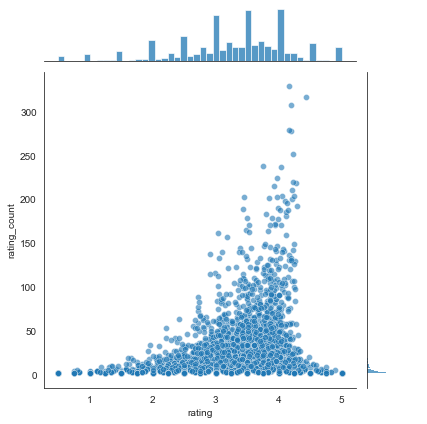

In [18]:
sns.jointplot(x = 'rating', y = 'rating_count', data= rating_df, alpha = 0.6)

# Recommnding Similar Movies:



In [19]:
df.head(10)

,movieId,title,userId,rating,timestamp
0,1,Toy Story (1995),1,4.0,964982703
1,1,Toy Story (1995),5,4.0,847434962
2,1,Toy Story (1995),7,4.5,1106635946
3,1,Toy Story (1995),15,2.5,1510577970
4,1,Toy Story (1995),17,4.5,1305696483
5,1,Toy Story (1995),18,3.5,1455209816
6,1,Toy Story (1995),19,4.0,965705637
7,1,Toy Story (1995),21,3.5,1407618878
8,1,Toy Story (1995),27,3.0,962685262
9,1,Toy Story (1995),31,5.0,850466616


* Now lets create a matrix Table, on which userId will be on one axis and movie title on other axis. Each cell will then consist of the rating the user gave to that movie. (Note that there will be a lot of NAN values, as most of the people have not seen most of the movies)

In [20]:
movie_mat= df.pivot_table(index = 'userId', columns= 'title', values= 'rating')
movie_mat.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Sorting the rating Dataframe on rating counts:
rating_df.sort_values('rating_count',ascending= False).head()

,rating,rating_count
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278


In [22]:
# Now lets grab user rating for these two movies:
forestgump_UR = movie_mat['Forrest Gump (1994)']
Pulp_UR = movie_mat['Pulp Fiction (1994)']

In [23]:
forestgump_UR.head(10)

userId
1     4.0
2     NaN
3     NaN
4     NaN
5     NaN
6     5.0
7     5.0
8     3.0
9     NaN
10    3.5
Name: Forrest Gump (1994), dtype: float64

In [24]:
# we can then use corrwith() (correlation with) method to get corelation between two pandas series:
like_forestgump = movie_mat.corrwith(forestgump_UR)
like_pulp = movie_mat.corrwith(Pulp_UR)

C:\Users\skyya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\skyya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\skyya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\skyya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: divide by zero encountered in tru

In [25]:
# lets clean this by removing NAN values and using a Dataframe insted of a Series >
corr_forest = pd.DataFrame(like_forestgump, columns=['correlation'])

# Removing NAN : 
corr_forest.dropna(inplace= True)

# Sorting the dataframe in descending order of Correlation. We should be 
# able to get most similar movies. 

corr_forest = corr_forest.sort_values('correlation' ,ascending= False)

# We are getting some results which are not making sense as they are perfeclty co-related. 
# This is highly unlikely and happening because only few items are matching perfeclty. 
# LEts fix this by filtering out movies that have less than 100 reviews 

corr_forest  = corr_forest.join(rating_df['rating_count'])

# Now sort these on the basis of rating count (This will make more  sense):
corr_forest  = corr_forest.sort_values('rating_count', ascending= False)

corr_forest.head()

,correlation,rating_count
title,,
Forrest Gump (1994),1.000000,329
"Shawshank Redemption, The (1994)",0.297438,317
Pulp Fiction (1994),0.077001,307
"Silence of the Lambs, The (1991)",0.221777,279
"Matrix, The (1999)",0.280199,278


In [26]:
# now fetching those movies whose rating count are more than 100:
corr_forest[corr_forest['rating_count']> 100].head(6)

,correlation,rating_count
title,,
Forrest Gump (1994),1.000000,329
"Shawshank Redemption, The (1994)",0.297438,317
Pulp Fiction (1994),0.077001,307
"Silence of the Lambs, The (1991)",0.221777,279
"Matrix, The (1999)",0.280199,278
Star Wars: Episode IV - A New Hope (1977),0.108355,251


In [27]:
# Doing the same for Pulp Fiction 
cor_pulp = pd.DataFrame(like_pulp,columns= ['correlation'])
cor_pulp.dropna(inplace= True)
cor_pulp = cor_pulp.join(rating_df['rating_count'])
cor_pulp = cor_pulp[cor_pulp['rating_count']>100].sort_values('correlation',ascending= False)

In [28]:
cor_pulp.head()

,correlation,rating_count
title,,
Pulp Fiction (1994),1.000000,307
Fight Club (1999),0.543465,218
Kill Bill: Vol. 1 (2003),0.504147,131
Trainspotting (1996),0.437714,102
Kill Bill: Vol. 2 (2004),0.421685,110
